In [1]:
# Import all the required Libraries

import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import networkx as nx
import math
import csv
import matplotlib.pylab as pyl
import itertools

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read required input files

match_df = pd.read_json("dataset\matches\matches_England.json")
event_df = pd.read_json("dataset\events\events_England.json")
player_df = pd.read_json("dataset\players.json")
team_data_df = pd.read_json("dataset/teams.json") 





In [3]:
# Data Preprocessing

# Conversion of special character into normal character in players name

def jsonparse(x):
    s = '"'+x+'"'
    s = s.replace('	', '')
    return json.loads(s.replace('	', ''))

player_df['shortName'] = player_df['shortName'].map(lambda x: jsonparse(x))


# Addition of a player name based on player id in the event dataframe

a=player_df[['wyId','shortName']]    # Selecting the player name from player dataframe
b=event_df[['playerId']]             # Selecting the playerId from the event dataframe
c=b.merge(a,how='left', left_on='playerId', right_on='wyId')  # Merging both the dataframe

event_df["player"] = c.shortName           # Addition of the player name in the event dataframe



In [7]:
# Function to create the soccer pitch

def draw_pitch(pitch, line, orientation, view):
  
    orientation = orientation
    view = view
    line = line
    pitch = pitch
    
    if orientation.lower().startswith("h"):
        
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.8,18.4))
            plt.xlim(49,105)
            plt.ylim(-1,49)
        else:
            fig,ax = plt.subplots(figsize=(18.4,10.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
    
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(93,34,color=line,zorder=5)
        plt.scatter(11,34,color=line,zorder=5)
        plt.scatter(52,34,color=line,zorder=5)

        circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)

        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,101)
        ax.axis('off') # this hides the x and y ticks

        # side and goal lines #
        lx1 = [0,0,100,100,0]
        ly1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)

        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)


        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)

In [8]:
def passing_network(match_Id = 2499954):
    
 
    team_temp_list = []   # Temporary team metric list
    
    
    match_description = match_df.label[match_df.wyId == match_Id].values[0]  
    
    print(match_description)
 
    # Filtering the passing events
    pass_events = event_df[(event_df.matchId == match_Id) & (event_df.eventName == 'Pass')]
    pass_events = pass_events.dropna(how='any',axis=0)

    
    # Altering the time of the event in the second half by adding the maximum time of the first half
    first_half_max_duration = np.max(pass_events[pass_events['matchPeriod'] == '1H']['eventSec'])
    pass_events.loc[pass_events.matchPeriod == "2H", "eventSec"] = pass_events.eventSec + first_half_max_duration  
    
   
      
        
    # Segregation of teams  and team passes in the match
    
    team_id=pass_events.teamId.unique()
    
    # Team names
    team1_name = team_data_df.name[team_data_df['wyId']==team_id[0]].values[0]
    team2_name = team_data_df.name[team_data_df['wyId']==team_id[1]].values[0]
    
   
     
    # Seperation of the passess 
    team1_pass_events = pass_events[pass_events['teamId'] == team_id[0]]
    team2_pass_events = pass_events[pass_events['teamId'] == team_id[1]]       
       

    # Result of the match
    winner = match_df.winner[match_df['wyId'] == match_Id].values[0]
    
    if winner == team_id[0]:
        team_temp_list.append("Team_1")
    else:
        if winner == team_id[1]:
            team_temp_list.append("Team_2")
        else:
            team_temp_list.append("Draw")       
        

    
        

#   split pass between team1 and team2 
    
    team_1 = pd.DataFrame()
    
    team_1['sender'] = team1_pass_events.player
    team_1['receiver'] = team1_pass_events.player.shift(-1).dropna()
    
    team_2 = pd.DataFrame()
    team_2['sender'] = team2_pass_events.player
    team_2['receiver'] = team2_pass_events.player.shift(-1).dropna()
    
 


    #create dataframe of sender and receiver with number of passes for team 1
    
    df_team1 = []
    for i,row in team_1.iterrows():
        if row['sender'] == row['receiver']:
            pass        
        else:
            df_team1.append([row['sender'],row['receiver']])
    df_team1 = pd.DataFrame(df_team1, columns=['sender','receiver']) 
    
    # Dataframe with total number of passess between two player of team 1
    df_team1_count = df_team1.groupby(['sender','receiver']).size().reset_index(name="No_of_Passes")
    
      
         
    # Total number of passess in team 1 
   
    team1_total_passes = df_team1_count.No_of_Passes.sum()     
       
    



    # create dataframe of sender and receiver with number of passes for team 2

    df_team2 = []
    for i,row in team_2.iterrows():
        if row['sender'] == row['receiver']:
            pass        
        else:
            df_team2.append([row['sender'],row['receiver']])
    df_team2 = pd.DataFrame(df_team2, columns=['sender','receiver']) 
    
    # Dataframe with total number of passess between two player of team 2
    df_team2_count = df_team2.groupby(['sender','receiver']).size().reset_index(name="No_of_Passes")
    
    # Total number of passess in team 2 
   
    team2_total_passes = df_team2_count.No_of_Passes.sum()  
   

    

    # Calculation of position of the player for team 1   

    pos1 = {}
    actual_pos1 = {}
    pos1_relative = {}  # Position of the player with respect to football pitch layout
    
        
    for player in list(df_team1['sender'].unique()):
        x, y = [], []
        df_match_player = pass_events[pass_events.player==player]
        for i,row in df_match_player.iterrows():
            x.append(row['positions'][0]['x'])            
            y.append(row['positions'][0]['y'])
            
        # Mean position of the player
        actual_pos1[player] = (int(np.mean(x)), int(np.mean(y)))
        pos1[player] = (int(105 - np.mean(x)), int(69-(np.mean(y))))
        pos1_relative[(player)] = (int(105 - np.mean(x)), int(69-(np.mean(y)/100 * 69)))
        
        
       
    
    # Calculation of the average possession position of the team 1
    pos1_df =  pd.DataFrame(actual_pos1).T.reset_index()
    pos1_df.columns = ['Player','X','Y']
    
    team1_possession_mean_x = pos1_df["X"].mean()
    team1_possession_mean_y = pos1_df["Y"].mean()
    
    
  
        
    # Calculation of position of the player for team 2  

    pos2 = {}
    actual_pos2 = {}
    pos2_relative = {}  # Position of the player with respect to football pitch layout
    
    for player in list(df_team2['sender'].unique()):
        x, y = [], []
        df_match_player = pass_events[pass_events.player==player]
        for i,row in df_match_player.iterrows():
            x.append(row['positions'][0]['x'])
            y.append(row['positions'][0]['y'])
        
        # Mean position of the players during the match
                
        actual_pos2[player] = (int(np.mean(x)), int(np.mean(y)))
        pos2[(player)] = (int(np.mean(x)), int(np.mean(y)))        
        pos2_relative[(player)] = (int(np.mean(x)), int(np.mean(y)/100 * 69))
        
    
   
     # Calculation of the average possession position of the team 2
    pos2_df =  pd.DataFrame(actual_pos2).T.reset_index()
    pos2_df.columns = ['Player','X','Y']
    
    team2_possession_mean_x = pos2_df["X"].mean()
    team2_possession_mean_y = pos2_df["Y"].mean()   
 
    
    
  # Passing Network for the team 1
    
    g = nx.Graph()
    for i,row in df_team1_count.iterrows():
        g.add_edge(row['sender'],row['receiver'],weight=row['No_of_Passes'])
    deg = dict(g.degree)
    team1_degree = 0
    for player_deg in deg.values():
        team1_degree = team1_degree + player_deg
    
    
    team1_centrality = round(nx.global_reaching_centrality(g),2)
    team1_avg_clustering = round(nx.average_clustering(g),2)    
    team1_connectivity = round(nx.algebraic_connectivity(g),2)
    team1_density = round(nx.density(g),2)
    team1_diameter = nx.diameter(g)
    team1_asp = round(nx.average_shortest_path_length(g),2)
    

       
    if (match_Id == 2499954) | (match_Id == 2499943) : 
        nx.draw(g, pos1, with_labels=True, node_size=[v * 100 for v in deg.values()], font_size=10, font_weight='normal')
        nx.write_gexf(g, "team_1.gexf")
        plt.title(team1_name, fontsize=20)
        plt.show()
        print (team1_name)
        print("Total Pass =", team1_total_passes)
        print("Avg position of team on X_axis(nearnees to the opponent Goal) = ", round(team1_possession_mean_x,2))
        print("Avg position of team on Y_axis(Position from the right hand side of the pitch) = ", round(team1_possession_mean_y,2))
        print('Degree = ',team1_degree)
        print ('Centrality =', round(nx.global_reaching_centrality(g),2))
        print ('Clustering =', round(nx.average_clustering(g),2))   
        print ('Algebric Connectivity =', round(nx.algebraic_connectivity(g),2))
        print ('Density =', round(nx.density(g),2))
        print ('Diameter =', nx.diameter(g))
        print ('Average Path Length =', round(nx.average_shortest_path_length(g),2))
        print ('')
    
    # Passing Network for the team 2
    
    r = nx.Graph()
    for i,row in df_team2_count.iterrows():
        r.add_edge(row['sender'],row['receiver'],weight=row['No_of_Passes'])
    deg = dict(r.degree)
    team2_degree = 0
    for player_deg in deg.values():
        team2_degree = team2_degree + player_deg
    
    team2_centrality = round(nx.global_reaching_centrality(r),2)
    team2_avg_clustering = round(nx.average_clustering(r),2)
    team2_connectivity =round(nx.algebraic_connectivity(r),2)
    team2_density = round(nx.density(r),2)
    team2_diameter = nx.diameter(r)
    team2_asp = round(nx.average_shortest_path_length(r),2)
    

        
    if (match_Id == 2499954) | (match_Id == 2499943) :  
        nx.draw(r, pos2, node_color='r', node_size=[v * 100 for v in deg.values()],with_labels=True, font_size=10, font_weight='normal')
        nx.write_gexf(r, "team_2.gexf")
        plt.title(team2_name, fontsize=20)
        plt.show()
        
        print (team2_name)
        print("Total Pass =", team2_total_passes)
        print("Avg position of team on X_axis(nearnees to the opponent Goal) = ", round(team2_possession_mean_x,2))
        print("Avg position of team on Y_axis(Position from the right hand side of the pitch) = ", round(team2_possession_mean_y,2))
        print('Degree = ',team2_degree)        
        print ('Centrality =', round(nx.global_reaching_centrality(r),2))
        print ('Clustering =', round(nx.average_clustering(r),2))
        print ('Algebric Connectivity =', round(nx.algebraic_connectivity(r),2))
        print ('Density =', round(nx.density(r),2))
        print ('Diameter =', nx.diameter(r))
        print ('Average Path Length =', round(nx.average_shortest_path_length(r),2))
        
        
    # Append all the features in the original list
    
    team_temp_list.append(team1_name)
    team_temp_list.append(team2_name)
    team_temp_list.append(team1_total_passes)
    team_temp_list.append(team2_total_passes)
    team_temp_list.append(round(team1_possession_mean_x,2))
    team_temp_list.append(round(team1_possession_mean_y,2))
    team_temp_list.append(round(team2_possession_mean_x,2))
    team_temp_list.append(round(team2_possession_mean_y,2))
    team_temp_list.append(team1_degree)
    team_temp_list.append(team2_degree)
    team_temp_list.append(team1_centrality)
    team_temp_list.append(team2_centrality)
    team_temp_list.append(team1_avg_clustering)
    team_temp_list.append(team2_avg_clustering)
    team_temp_list.append(team1_connectivity)
    team_temp_list.append(team2_connectivity)
    team_temp_list.append(team1_density)
    team_temp_list.append(team2_density)   
    team_temp_list.append(team1_diameter)
    team_temp_list.append(team2_diameter)
    team_temp_list.append(team1_asp)
    team_temp_list.append(team2_asp)
    
    

    
    teams_metrics_list.append(team_temp_list)
    
   
    # Plot the network on the Football pitch
    
    if (match_Id == 2499954) | (match_Id == 2499943) :  
        
        f = draw_pitch("#195905", "#faf0e6", "h", "full")
        g = nx.Graph()
        for i,row in df_team1_count.iterrows():
            g.add_edge(row['sender'],row['receiver'],weight=row['No_of_Passes'])
        d = dict(g.degree)
        nx.draw(g, pos1_relative, with_labels=True, node_color='grey', node_size=[v * 100 for v in d.values()], font_color='w',font_size=10, font_weight='bold')
       # nx.write_gexf(g, "team_1.gexf")




        g = nx.Graph()
        for i,row in df_team2_count.iterrows():
            g.add_edge(row['sender'],row['receiver'],weight=row['No_of_Passes'])
        d = dict(g.degree)
        nx.draw(g, pos2_relative, with_labels=True, node_size=[v * 100 for v in d.values()], font_color='w', font_size=10, font_weight='bold')
        #nx.write_gexf(g, "team_2.gexf")

        plt.title(match_description, fontsize=20)
        plt.show()
    
    
  
    
    


In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Manchester City - Newcastle United, 3 - 1


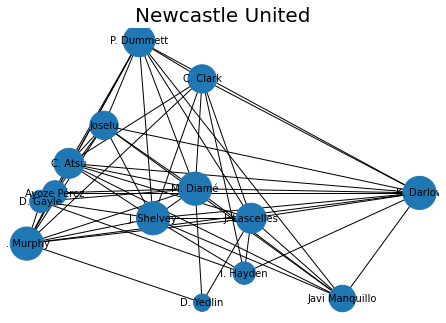

Newcastle United
Total Pass = 148
Avg position of team on X_axis(nearnees to the opponent Goal) =  47.14
Avg position of team on Y_axis(Position from the right hand side of the pitch) =  50.93
Degree =  114
Centrality = 0.12
Clustering = 0.73
Algebric Connectivity = 3.87
Density = 0.63
Diameter = 2
Average Path Length = 1.37



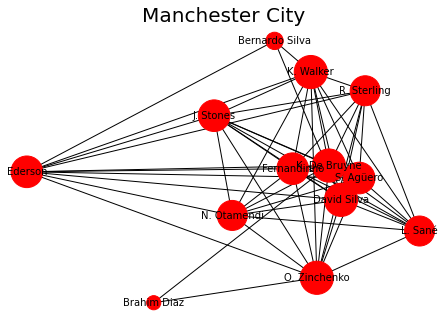

Manchester City
Total Pass = 783
Avg position of team on X_axis(nearnees to the opponent Goal) =  53.85
Avg position of team on Y_axis(Position from the right hand side of the pitch) =  48.08
Degree =  116
Centrality = 0.1
Clustering = 0.91
Algebric Connectivity = 2.12
Density = 0.74
Diameter = 3
Average Path Length = 1.27


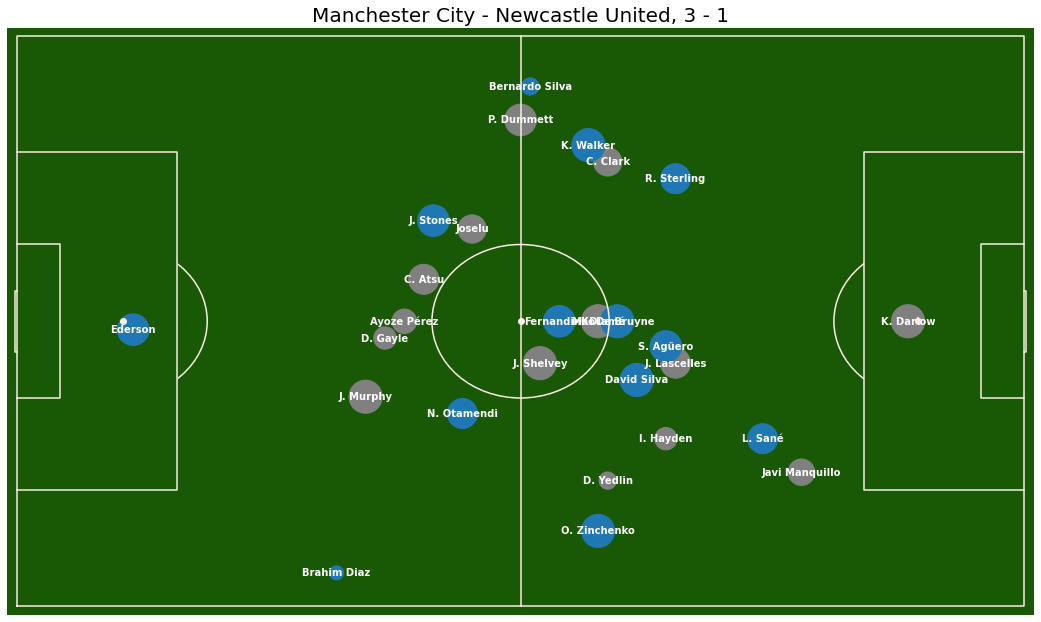

Liverpool - Manchester City, 4 - 3


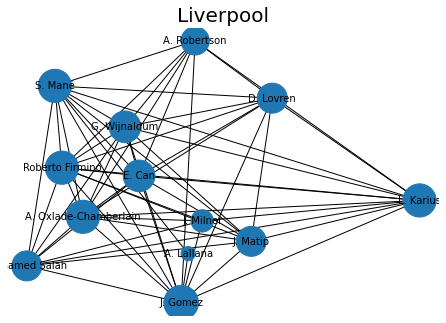

Liverpool
Total Pass = 338
Avg position of team on X_axis(nearnees to the opponent Goal) =  45.77
Avg position of team on Y_axis(Position from the right hand side of the pitch) =  52.31
Degree =  118
Centrality = 0.13
Clustering = 0.9
Algebric Connectivity = 2.1
Density = 0.76
Diameter = 2
Average Path Length = 1.24



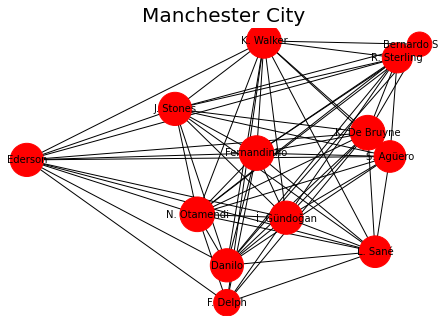

Manchester City
Total Pass = 614
Avg position of team on X_axis(nearnees to the opponent Goal) =  44.85
Avg position of team on Y_axis(Position from the right hand side of the pitch) =  48.38
Degree =  134
Centrality = 0.08
Clustering = 0.91
Algebric Connectivity = 16.84
Density = 0.86
Diameter = 2
Average Path Length = 1.14


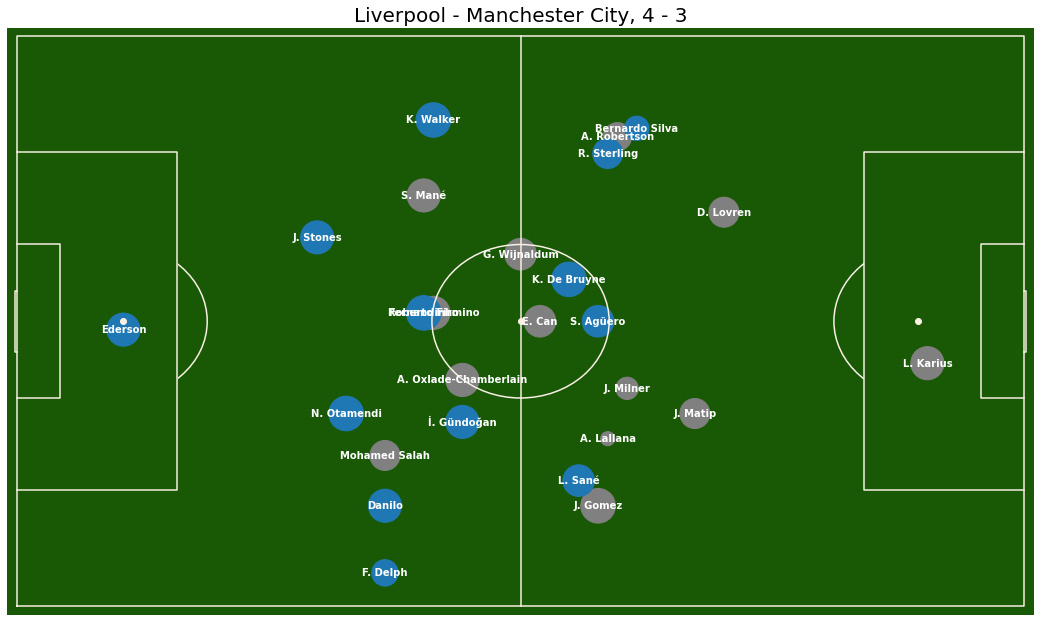

In [10]:
# Global list contains all the metrics of both the team in a match
teams_metrics_list = []  
matchid = [2499954,2499943]
for match in matchid:
    passing_network(match)

In [11]:
data=np.array(teams_metrics_list)
columns = ['Winner','Team_1', 'Team_2', 'T1_Passes','T2_Passes','T1_possession_X','T1_possession_Y','T2_possession_X','T2_possession_Y','T1_degree','T2_degree','T1_Centrality','T2_Centrality','T1_Avg_Cluster','T2_Avg_Cluster','T1_Connectivity','T2_Connectivity','T1_Density','T2_Density','T1_Diameter','T2_Diameter','T1_ASP','T2_ASP']
feature_df = pd.DataFrame(data, columns=columns) 

In [13]:
# Dataframe of Network Metrics

temp = feature_df['Winner']
feature_df.drop(labels=['Winner'], axis=1, inplace = True)
feature_df.insert(22, 'Winner', temp)
feature_df

,Team_1,Team_2,T1_Passes,T2_Passes,T1_possession_X,T1_possession_Y,T2_possession_X,T2_possession_Y,T1_degree,T2_degree,...,T2_Avg_Cluster,T1_Connectivity,T2_Connectivity,T1_Density,T2_Density,T1_Diameter,T2_Diameter,T1_ASP,T2_ASP,Winner
0,Newcastle United,Manchester City,148,783,47.14,50.93,53.85,48.08,114,116,...,0.91,3.87,2.12,0.63,0.74,2,3,1.37,1.27,Team_2
1,Liverpool,Manchester City,338,614,45.77,52.31,44.85,48.38,118,134,...,0.91,2.1,16.84,0.76,0.86,2,2,1.24,1.14,Team_1
